 # PRCP-1016-HeartDieseasePred

## PROBLEM STATEMENT

With the rise in heart disease cases worldwide, it is crucial for healthcare providers to proactively identify     individuals at risk to prevent life-threatening conditions. The hospital aims to leverage data-driven insights and
machine learning algorithms to predict potential heart diseases. This involves analyzing patient data to uncover            significant patterns and trends, developing a predictive model for early identification of at-risk individuals,            and providing actionable recommendations to the hospital to enhance patient care and prevent heart disease-related          fatalities.

### Attributes
patient_id: Unique and random identifier

slope_of_peak_exercise_st_segment: The slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart

thal: Results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect

resting_blood_pressure: resting blood pressure

chest_pain_type: chest pain type (4 values)

num_major_vessels: number of major vessels (0-3) colored by flourosopy

fasting_blood_sugar_gt_120_mg_per_dl: fasting blood sugar > 120 mg/dl

resting_ekg_results: resting electrocardiographic results (values 0,1,2)

serum_cholesterol_mg_per_dl: serum cholestoral in mg/dl

oldpeak_eq_st_depression: oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms

sex: 0: female, 1: male

age: age in years

max_heart_rate_achieved: maximum heart rate achieved (beats per minute)

exercise_induced_angina: exercise-induced chest pain (0: False, 1: True)

# 1.IMPORTING LIBRARIES

In [1]:
# Importing numpy library for working with arrays
import numpy as np

# Importing pandas library for working with data sets
import pandas as pd

# Importing seaborn library for visualization
import seaborn as sns

# Importing matplotlib.pyplot for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Importing warnings for disable warnings from the code
import warnings

# To ignore the warnings
warnings.filterwarnings('ignore')

# Importing ProfileReport from ydata_profiling
from ydata_profiling import ProfileReport

# Importing OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Importing MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler

# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

# Importing train_test_split
from sklearn.model_selection import train_test_split

# Importing metrics for evaluating the performance of Regression models
from sklearn.metrics import *

# Importing LogisticRegression model from sklearn
from sklearn.linear_model import LogisticRegression

# Importing KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Importing SVC model from sklearn
from sklearn.svm import SVC

# Importing DecisionTreeClassifier model from sklearn
from sklearn.tree import DecisionTreeClassifier

# Importing RandomForestClassifier model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Importing MLPClassifier model from sklearn
from sklearn.neural_network import MLPClassifier

# Importing GridSearchCV for Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Importing RandomizedSearchCV for Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

#Importing ensemble learning 
from sklearn.ensemble import *

D:\newjurney\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 2.DATA LOADING

In [2]:
#loading the features dataset using the pandas 
data1=pd.read_csv('values.csv')


#loading the target dataset using pandas
data2=pd.read_csv('labels.csv') 

# 3.BASIC CHECKS

In [4]:
#checking head() for data1
data1.head()

patient_id  slope_of_peak_exercise_st_segment               thal  \
0     0z64un                                  1             normal   
1     ryoo3j                                  2             normal   
2     yt1s1x                                  1             normal   
3     l2xjde                                  1  reversible_defect   
4     oyt4ek                                  3  reversible_defect   

   resting_blood_pressure  chest_pain_type  num_major_vessels  \
0                     128                2                  0   
1                     110                3                  0   
2                     125                4                  3   
3                     152                4                  0   
4                     178                1                  0   

   fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
0                                     0                    2   
1                                     0                    0   
2                                     0                    2   
3                                     0                    0   
4                                     0                    2   

   serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
0                          308                       0.0    1   45   
1                          214                       1.6    0   54   
2                          304                       0.0    1   77   
3                          223                       0.0    1   40   
4                          270                       4.2    1   59   

   max_heart_rate_achieved  exercise_induced_angina  
0                      170                        0  
1                      158                        0  
2                      162                        1  
3                      181                        0  
4                      145                        0

In [5]:
#checking head() for data2
data2.head()

patient_id  heart_disease_present
0     0z64un                      0
1     ryoo3j                      0
2     yt1s1x                      1
3     l2xjde                      1
4     oyt4ek                      0

In [5]:
#checking tail for data1
data1.tail()

patient_id  slope_of_peak_exercise_st_segment               thal  \
175     5qfar3                                  2  reversible_defect   
176     2s2b1f                                  2             normal   
177     nsd00i                                  2  reversible_defect   
178     0xw93k                                  1             normal   
179     2nx10r                                  1             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
175                     125                4                  2   
176                     180                4                  0   
177                     125                3                  0   
178                     124                3                  2   
179                     160                3                  1   

     fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
175                                     1                    0   
176                                     0                    1   
177                                     0                    0   
178                                     1                    0   
179                                     0                    0   

     serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
175                          254                       0.2    1   67   
176                          327                       3.4    0   55   
177                          309                       1.8    1   64   
178                          255                       0.0    1   48   
179                          201                       0.0    0   54   

     max_heart_rate_achieved  exercise_induced_angina  
175                      163                        0  
176                      117                        1  
177                      131                        1  
178                      175                        0  
179                      163                        0

In [6]:
#checking tail for data2
data2.tail()

patient_id  heart_disease_present
175     5qfar3                      1
176     2s2b1f                      1
177     nsd00i                      1
178     0xw93k                      0
179     2nx10r                      0

In [5]:
#Checking the patient_id column have same count and same order of values in this two dataframe
def compare_column(data1,data2,patient_id):
     # Check if both columns have the same count
    if data1["patient_id"].count() != data2["patient_id"].count():
        return False

    # Check if both columns have the same records
    if not data1["patient_id"].equals(data2["patient_id"]):
        return False

    return True
result = compare_column(data1, data2, 'patient_id')
print("Columns are same:", result)

Columns are same: True


In [6]:
#concat the data1 and data2
data=pd.concat([data1,data2.drop('patient_id',axis=1)],axis=1)

In [7]:
#checking the shape
data.shape

(180, 15)

Insight:
    
this dataframe contains 180 rows and 15 columns

In [10]:
# Checking names of the columns in the data2
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [11]:
#Checking the index
data.index

RangeIndex(start=0, stop=180, step=1)

In [12]:
#Checking for null values in the data
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

insight:
    
    the data does'nt have null values

In [13]:
# Checking for the data types of each column.
data.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

Insight:
    
1.most of the columns in the data is numerical data type
2.two columns are in object datatype

In [15]:
# Checking basic information about the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [19]:
# Checking basic statistical information for numerical columns
data.describe().T

count        mean        std    min  \
slope_of_peak_exercise_st_segment     180.0    1.550000   0.618838    1.0   
resting_blood_pressure                180.0  131.311111  17.010443   94.0   
chest_pain_type                       180.0    3.155556   0.938454    1.0   
num_major_vessels                     180.0    0.694444   0.969347    0.0   
fasting_blood_sugar_gt_120_mg_per_dl  180.0    0.161111   0.368659    0.0   
resting_ekg_results                   180.0    1.050000   0.998742    0.0   
serum_cholesterol_mg_per_dl           180.0  249.211111  52.717969  126.0   
oldpeak_eq_st_depression              180.0    1.010000   1.121357    0.0   
sex                                   180.0    0.688889   0.464239    0.0   
age                                   180.0   54.811111   9.334737   29.0   
max_heart_rate_achieved               180.0  149.483333  22.063513   96.0   
exercise_induced_angina               180.0    0.316667   0.466474    0.0   
heart_disease_present                 180.0    0.444444   0.498290    0.0   

                                         25%    50%     75%    max  
slope_of_peak_exercise_st_segment       1.00    1.0    2.00    3.0  
resting_blood_pressure                120.00  130.0  140.00  180.0  
chest_pain_type                         3.00    3.0    4.00    4.0  
num_major_vessels                       0.00    0.0    1.00    3.0  
fasting_blood_sugar_gt_120_mg_per_dl    0.00    0.0    0.00    1.0  
resting_ekg_results                     0.00    2.0    2.00    2.0  
serum_cholesterol_mg_per_dl           213.75  245.5  281.25  564.0  
oldpeak_eq_st_depression                0.00    0.8    1.60    6.2  
sex                                     0.00    1.0    1.00    1.0  
age                                    48.00   55.0   62.00   77.0  
max_heart_rate_achieved               132.00  152.0  166.25  202.0  
exercise_induced_angina                 0.00    0.0    1.00    1.0  
heart_disease_present                   0.00    0.0    1.00    1.0

In [17]:
#Checking basic statistical information for categorical columns
data.describe(include="O")

patient_id    thal
count         180     180
unique        180       3
top        0z64un  normal
freq            1      98

Insight:
    
1.The dataset contains 180 records with 13 features related to heart health.

2.The target variable is heart_disease_present, with a mean of 0.444, indicating that 44.4% of the individuals in the         dataset have heart disease.

3.The average age of individuals in the dataset is 54.81 years, with a standard deviation of 9.33.

4.The youngest individual is 29 years old, and the oldest is 77 years old.
  50% of the individuals are aged 48–62 years, indicating that heart disease risk is more prevalent in middle-aged and       older adults.
  
5.The average resting blood pressure is 131.31 mmHg, with a standard deviation of 17.01.
 25% of individuals have a resting blood pressure of 120 mmHg or below, while 75% have 140 mmHg or below. This suggests       that a significant portion of the population may have elevated or high blood pressure, which is a risk factor for heart     disease.
 
6.50% of individuals have cholesterol levels between 213.75 mg/dL and 281.25 mg/dL, indicating that many individuals have     cholesterol levels above the normal range (desirable: <200 mg/dL).

7.The average chest pain type is 3.16, with values ranging from 1 to 4.
   
   1: Typical angina
    2: Atypical angina
    3: Non-anginal pain
    4: Asymptomatic
    
8.About 31.7% of individuals experience exercise-induced angina (pain during physical activity), which is a significant       indicator of heart disease.

9.The average number of major vessels (affected by blockage) is 0.69, with a range of 0 to 3.

## 4. EXPLORATORY DATA ANALYSIS(EDA)

In [8]:
# Creating profile report
report=ProfileReport(data)
report


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 4.1Univariate Analysis

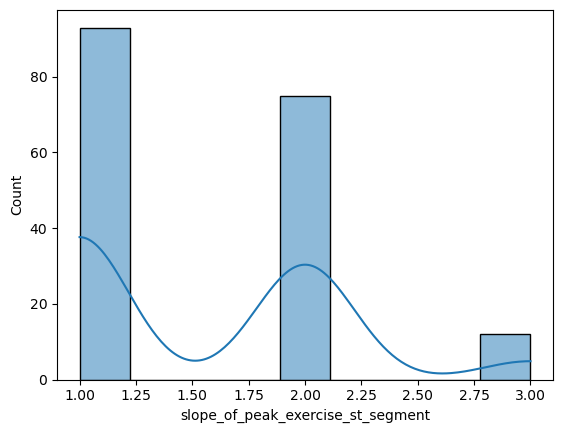

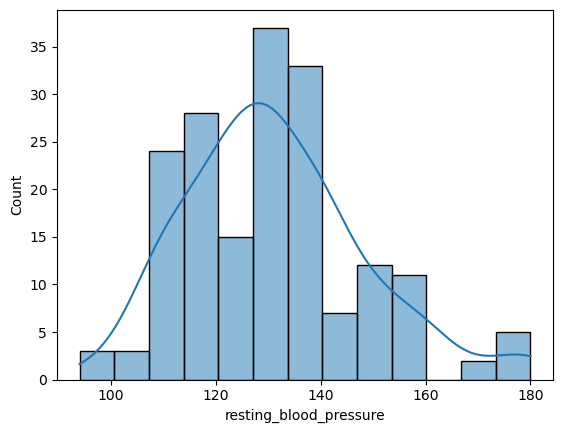

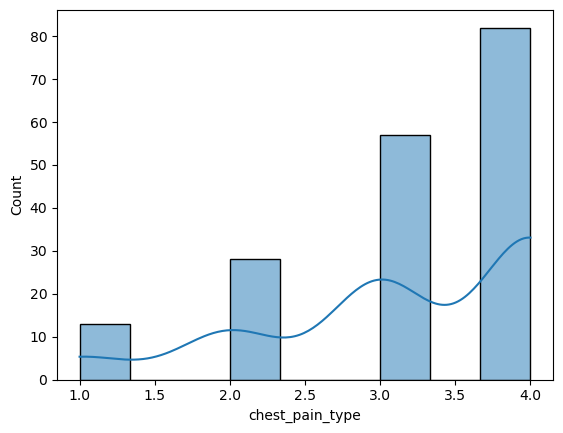

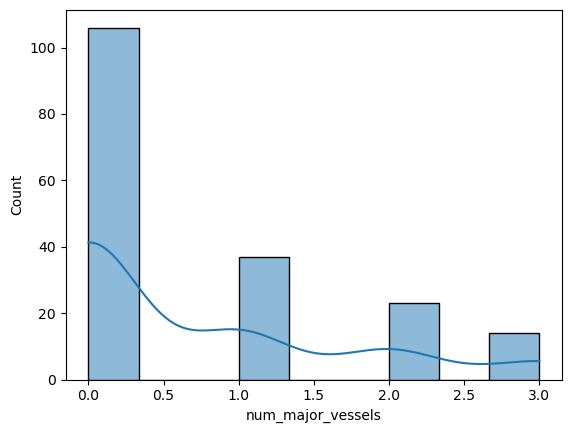

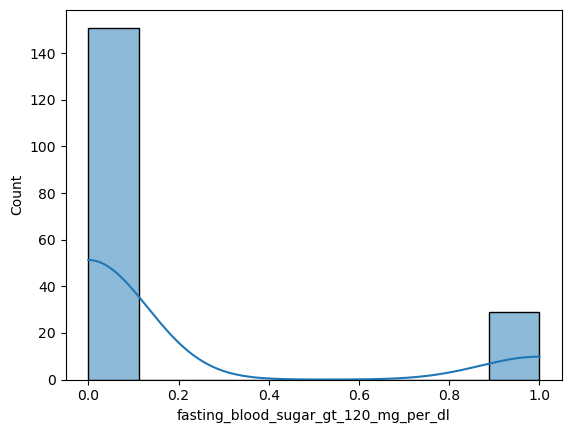

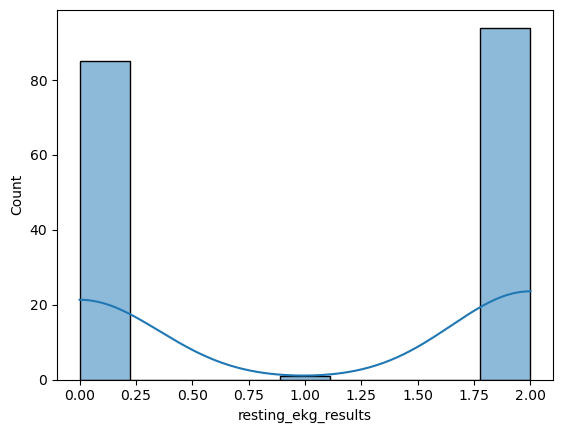

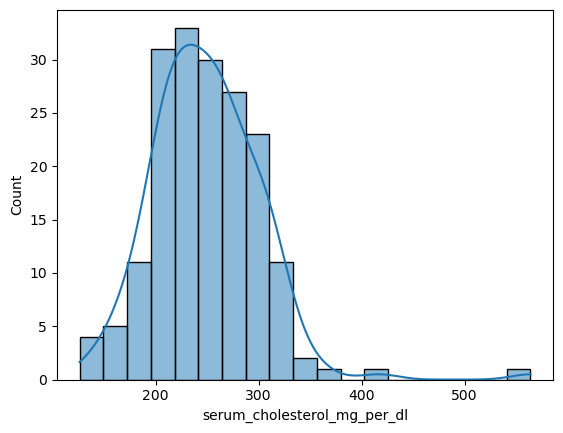

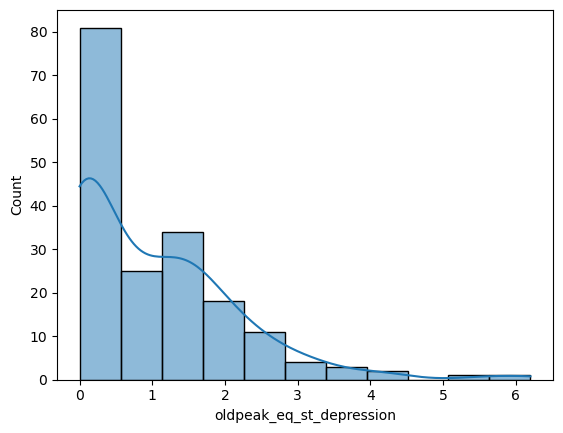

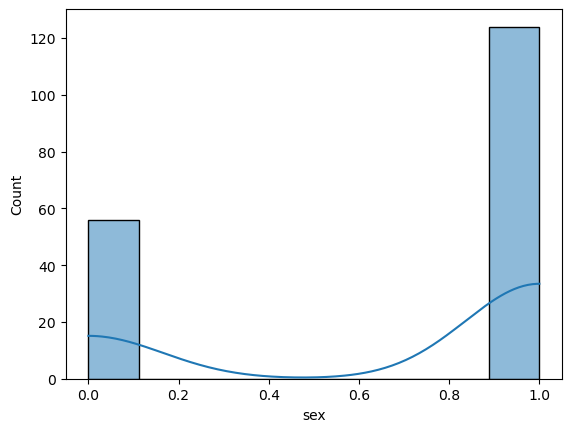

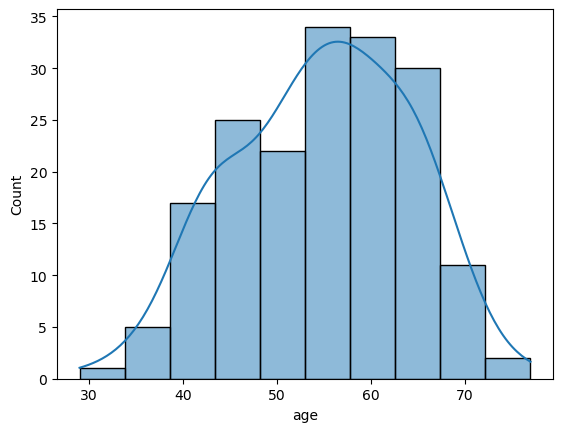

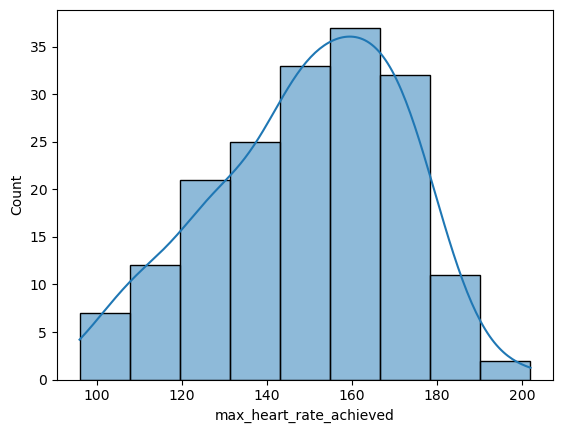

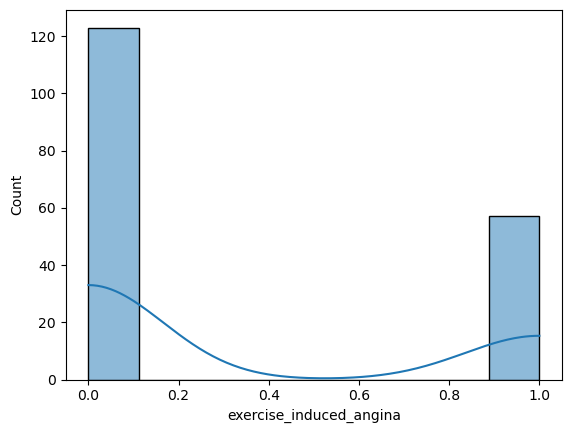

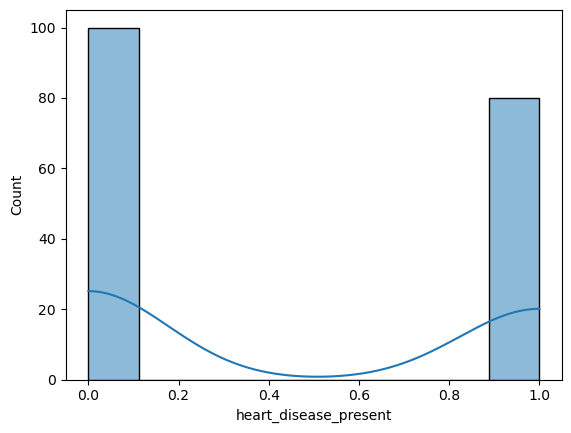

In [33]:
# Histogram for all numerical columns
for i in data.drop(['thal','patient_id'],axis=1):
    sns.histplot(data,x=i,kde=True)
    plt.show()

Insights:

1.slope_of_peak_exercise_st_segment The values range from 1 to 3, with the majority of the data clustered around 1 (25th percentile) and 2 (75th percentile). This suggests that most patients have a slope of 1 or 2, indicating a relatively normal to slightly abnormal ST segment response during peak exercise.

2.resting_blood_pressure The blood pressure ranges from 94 mmHg to 180 mmHg. The mean and median (130 mmHg) are close, indicating a relatively symmetric distribution. However, the presence of a maximum value of 180 mmHg suggests some patients may have hypertension.

3.chest_pain_type The chest pain type ranges from 1 to 4, with the majority of patients experiencing type 3 chest pain (50th percentile). This suggests that most patients have atypical angina, which is less severe than typical angina but still significant.

4.num_major_vessels The majority of patients (50th percentile) have 0 major vessels affected, but the range goes up to 3. This indicates that while most patients have no major vessel involvement, a significant portion has some degree of coronary artery disease.

5.fasting_blood_sugar_gt_120_mg_per_dl Only 16% of patients have fasting blood sugar levels greater than 120 mg/dL, indicating that most patients do not have elevated fasting blood sugar levels.

6.resting_ekg_results the majority of patients having a result of 2 .This suggests that most patients have some form of abnormality in their resting EKG.

7.serum_cholesterol_mg_per_dl  A healthy total cholesterol level for adults is less than 200 milligrams per deciliter (mg/dL) and A level of 200 to 239 mg/dL is considered borderline high, and 240 mg/dL or higher is considered high
but here we have patient with more than the healthy range which is some patients have the maximum serum_cholesterol which is  hypercholesterolemia that will lead to heart dissease

8.oldpeak_eq_st_depression The ST depression values range from 0 to 6.2, with the majority of patients having a value of 0 (25th percentile) or 0.8 (50th percentile). This suggests that most patients have minimal to no ST depression, but some have significant depression, which could indicate ischemia.

9.sex 69% of the patients are male (1), and 31% are female (0). This indicates a higher representation of males in the dataset.

10.The age ranges from 29 to 77 years, with the majority of patients being around 55 years old (50th percentile). This suggests that the dataset primarily includes middle-aged to older adults.

11.The maximum heart rate achieved ranges from 96 bpm to 202 bpm. The mean and median (152 bpm) are close, indicating a relatively symmetric distribution. This suggests that most patients achieve a heart rate within a normal range during exercise.

12.exercise_induced_angina 32% of patients experience exercise-induced angina (1), while 68% do not (0). This indicates that exercise-induced angina is not present in the majority of patients.

13.heart_disease_present 44% of patients have heart disease (1), while 56% do not (0). This suggests that the dataset is slightly imbalanced, with a higher proportion of patients without heart disease.

### 4.2 Bivariate Analysis 

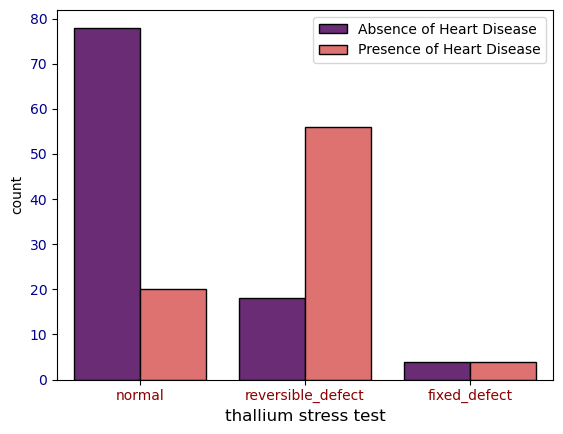

In [20]:
# Bivariate analysis for the catergorical column
# thallium stress test
sns.countplot(data = data,x = 'thal',hue = 'heart_disease_present',edgecolor = 'black',palette = 'magma')
plt.xlabel('thallium stress test',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkblue')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

Insights

1.Majority of the people who got the results of thallium stress test as normal tend to have no heart disease at all.

2.But the people who got reversible defect as the result for 
 the thallium stress test tend to have a higher number of heart disease cases present.
    
3.With fixed defect result from the thallium stress test the result seems to be balanced.
  we cannot interpret the outcome of heart present or not from that result class value.

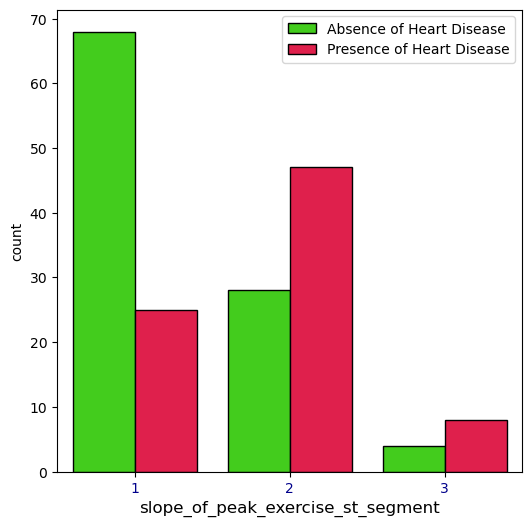

In [22]:
# Slope of peak with target
plt.figure(figsize = (6,6))
sns.countplot(data,x = 'slope_of_peak_exercise_st_segment',hue = 'heart_disease_present',edgecolor = 'black',palette = 'prism')
plt.xlabel('slope_of_peak_exercise_st_segment',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkblue')
plt.yticks(color = 'black')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

Insights:
    
    1.In our dataset majority of the data have slope_of_peak_excercise_st_segment value of 1, 
    which indicates mild depression and less chance of heart disease present in them.

    2.On the other hand people with high values of slope_of_peak_excercise_st_segment indicates higher chance of presence 
    of heart disease in them.

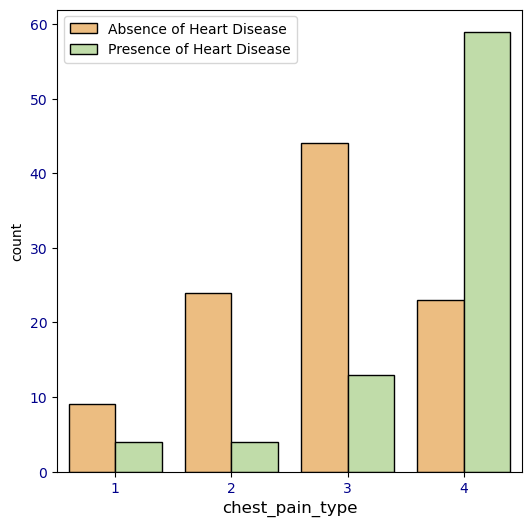

In [26]:
#bivariate analysis for chest_pain_type with target
plt.figure(figsize = (6,6))
sns.countplot(data,x = 'chest_pain_type',hue = 'heart_disease_present',edgecolor = 'black',palette = 'Spectral')
plt.xlabel('chest_pain_type',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkblue')
plt.yticks(color = 'darkblue')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

Insights:
    
    1.In our dataset majority of the people have a chest pain type of class-4 where most of them have a 
    presence of heart disease in them.
    
    2.Rest of the people who are of class 1,2 and 3 chest pain type have less presence of heart disease in them.

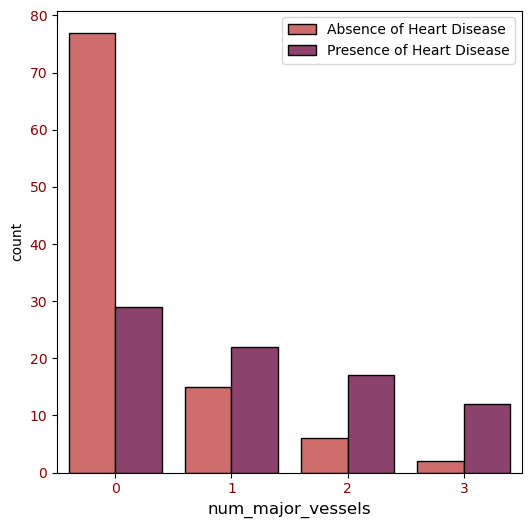

In [30]:
#Bivariate analysis for num_major_vessels with target variable
plt.figure(figsize=(6,6))
sns.countplot(data,x='num_major_vessels',hue="heart_disease_present",edgecolor='black',palette="flare")
plt.xlabel('num_major_vessels',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkred')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

Insights:
    
    1.In our dataset we have more number of people with 0 major vessels category indicating less presence of heart disease     in them.
    
    2.But in contrast the people with 1,2 or 3 vessels category have a high chance of presence of coronary heart disease in     them.

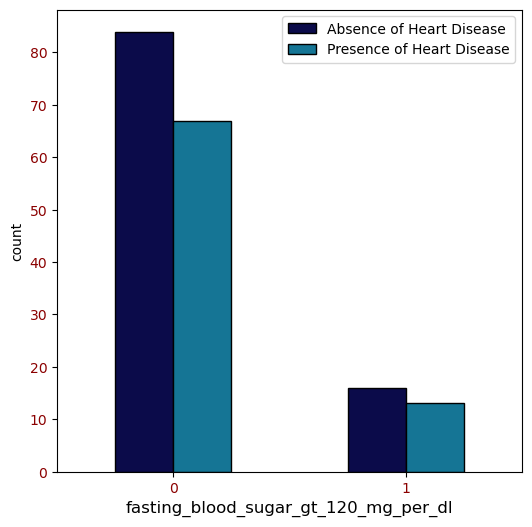

In [35]:
#bivariate analysis for fasting_blood_sugar_gt_120_mg_per_dl with target
plt.figure(figsize = (6,6))
sns.countplot(data ,x = 'fasting_blood_sugar_gt_120_mg_per_dl',width = 0.5,hue = 'heart_disease_present',edgecolor = 'black',palette = 'ocean')
plt.xlabel('fasting_blood_sugar_gt_120_mg_per_dl',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkred')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

Insight:
    
    1.In our dataset we have more number of people whose fasting blood sugar is less than 120mg/dl, 
      but also in that sample we are seeing a presence of heart disease in people.

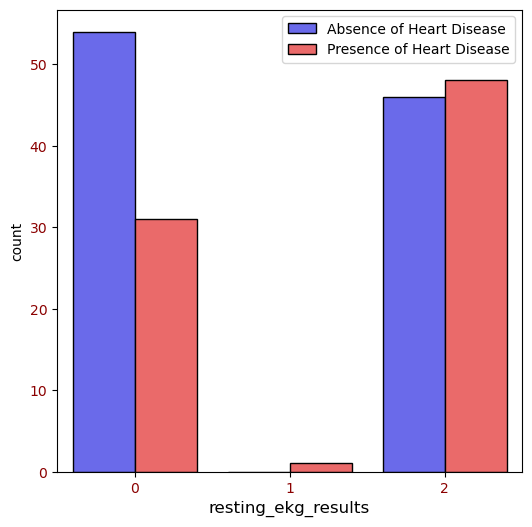

In [37]:
#bivariate analysis for resting_ekg_results with target
plt.figure(figsize = (6,6))
sns.countplot(data  ,x = 'resting_ekg_results',hue = 'heart_disease_present',edgecolor = 'black',palette = 'seismic')
plt.xlabel('resting_ekg_results',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkred')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

Insights:
    
    1.Value - 2 class people have equal chance of presence and absence of heart disease in them.
    
    2.majority of the people in the Value - 0 class has absence of heart-disease in them, 
     but there are people with the presence of heart-disease among them.
    
    3.Value - 1 in our dataset contains only one data value in our dataset which is not sufficient or not required
      for our analysis, so we will ignore that one value by taking only Value-0 and Value-2 for our analysis.

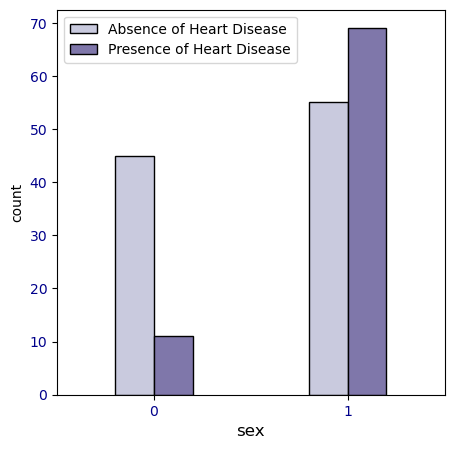

In [41]:
#Bivariate analysis for sex with respect to target
plt.figure(figsize = (5,5))
sns.countplot(data,x = 'sex',width = 0.4,hue = 'heart_disease_present',edgecolor = 'black',palette = 'Purples')
plt.xlabel('sex',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkblue')
plt.yticks(color = 'darkblue')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

Insights:
    
    1.Here 0 refers to female and 1 for male.
    
    2.Majority of the people in the feature inthe dataset are males and they have higher cases of presence of Heart 
    disease in them.
    
    3.Females on the other hand have very few cases of heart disease.

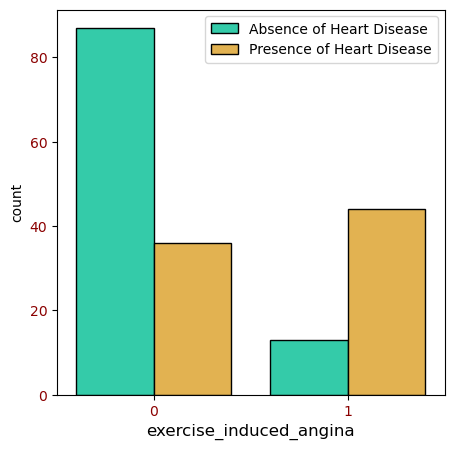

In [43]:
#bivariate analysis for exercise_induced_angina with target
plt.figure(figsize = (5,5))
sns.countplot(data ,x = 'exercise_induced_angina',hue = 'heart_disease_present',edgecolor = 'black',palette = 'turbo')
plt.xlabel('exercise_induced_angina',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkred')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

Insights:
    
1.0 indicates False and 1 indicates True.

2.Majority of the people in the dataset do not have excercise induced angina, so they have less chance of getting a heart disease.

3.But people who have excercise induced angina have higher chance of getting a heart disease.

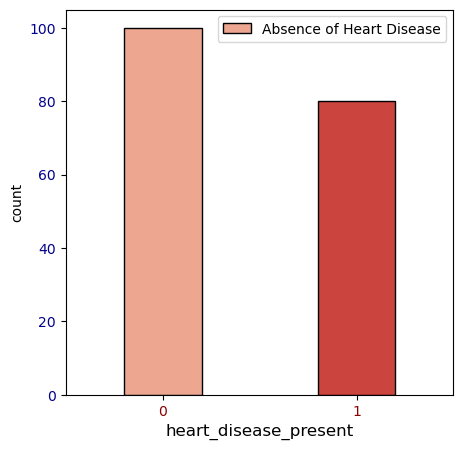

In [47]:
# Analysing our Dependent variable 'heart_disease_present'
plt.figure(figsize = (5,5))
sns.countplot(data ,width = 0.4,x = 'heart_disease_present',edgecolor = 'black',palette = 'Reds')
plt.xlabel('heart_disease_present',fontsize = 12,color = 'black')
plt.ylabel('count',color = 'black')
plt.xticks(color = 'darkred')
plt.yticks(color = 'darkblue')
plt.legend(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

Insights:

1.0 indicates no heart disease and 1 refers to the presence of heart disease.

2.Significant number of the people in the dataset have no heart disease at all.

### 4.3 Multivariate analysis

<Figure size 1500x1000 with 0 Axes>

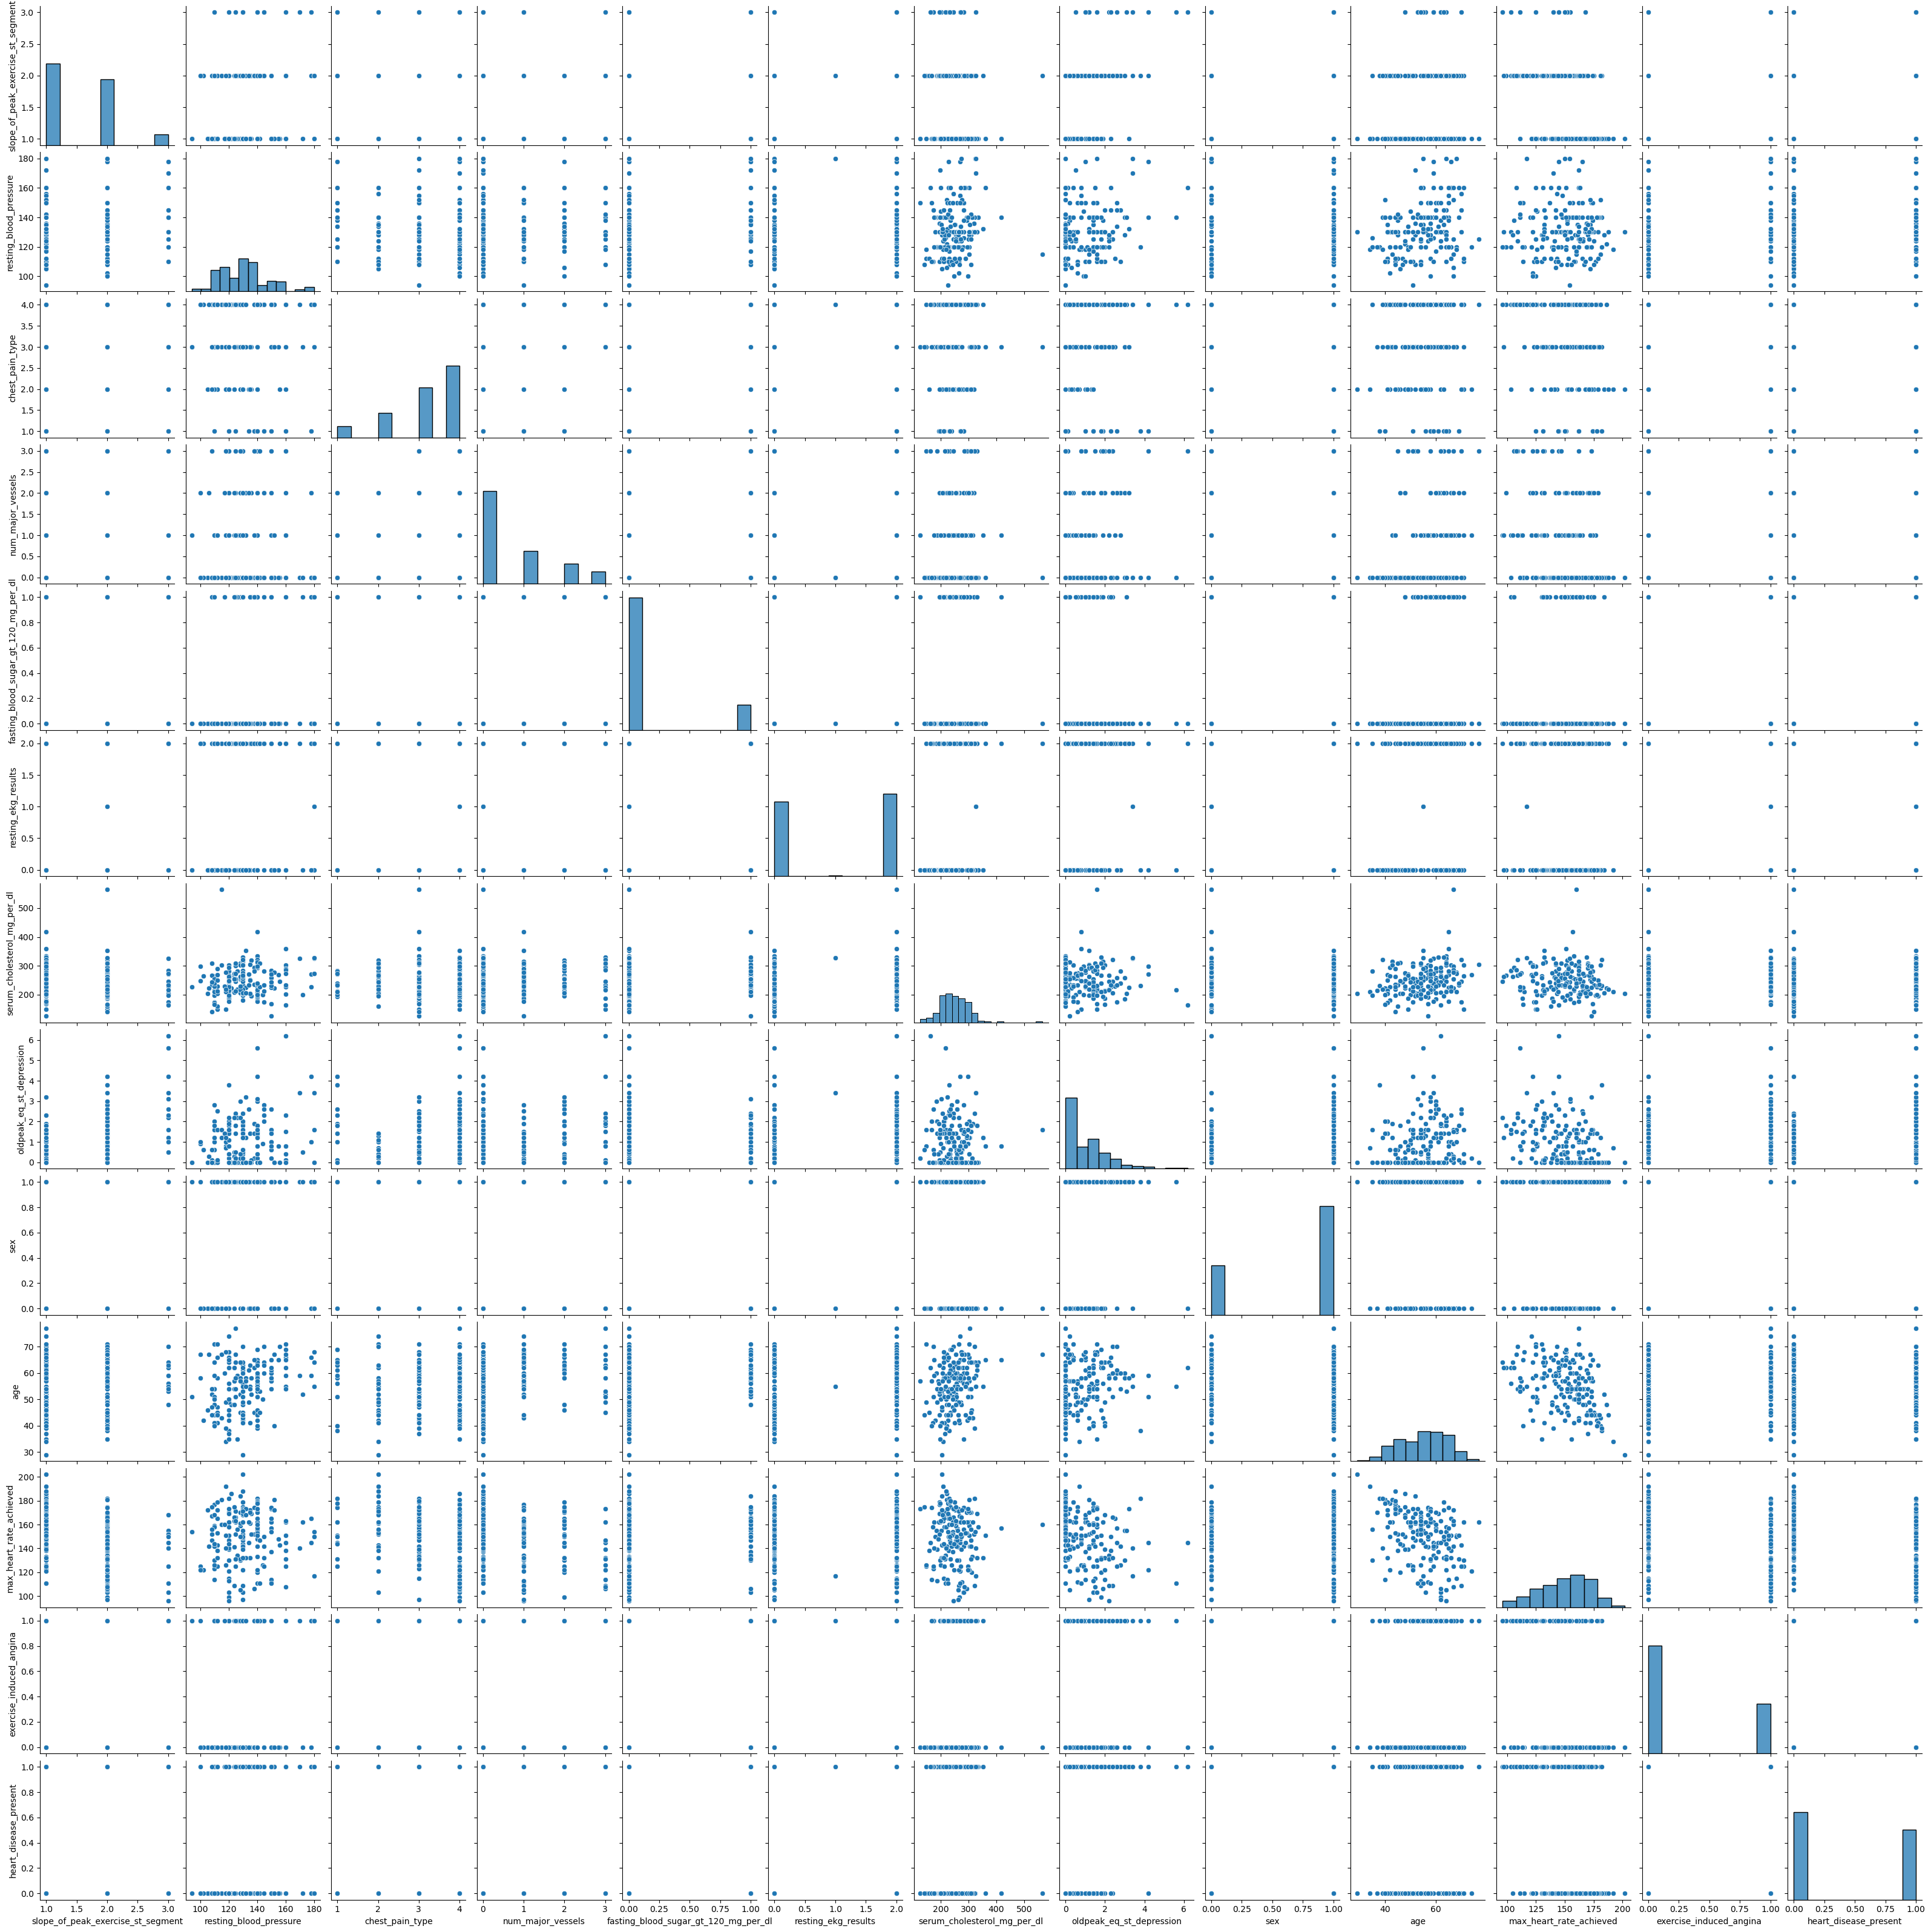

In [10]:
#multivariate analysis for the data 
plt.figure(figsize=(15, 10))
sns.pairplot(data=data)
plt.show()

Insights:
    
1.More than 50% of the patients resting blood pressure range is 120 to 160 and most got heart diseases present.

2.More than 70% of the patients serum chelesterol mg per dl most got heart present diseases.

3.Most of the patients is zero old peak ST depression induced by exercise relative to rest and not heart diseases present.

4.Majority patients max heart rate achived is 100 to 160 and heart diseases present.

# 5.DATA PREPROCESSING 

## 5.1 Checking Null values

In [136]:
#checking for null values in the data
data.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

Insight:

the data does'nt have any null values

## 5.2 Checking duplicate values

In [137]:
#checking duplicates in the data
data.duplicated().sum()

0

insight:

the data do not have duplicates in the record

## 5.3 Handling outliers

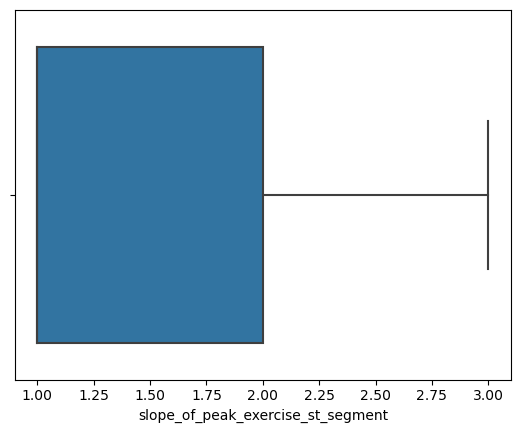

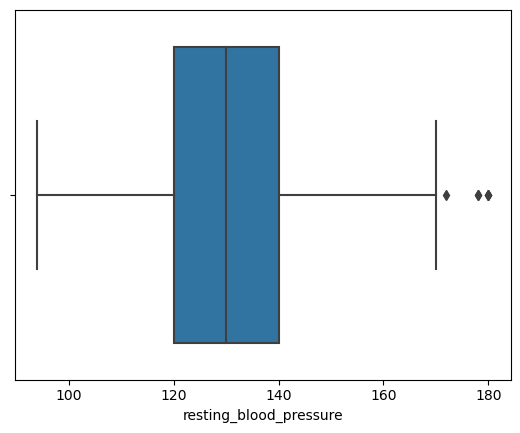

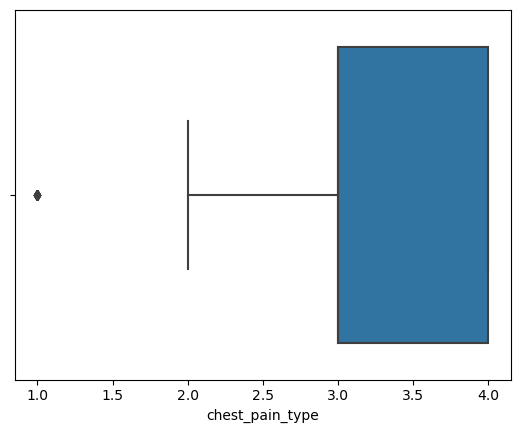

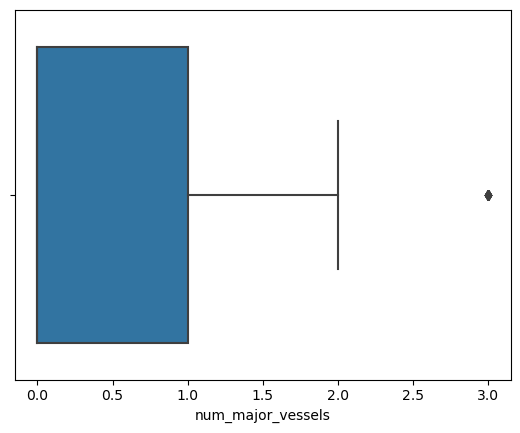

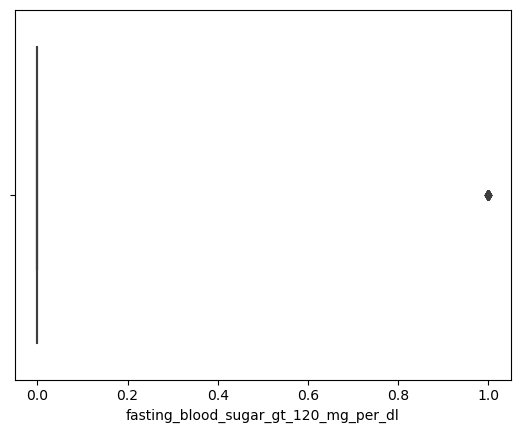

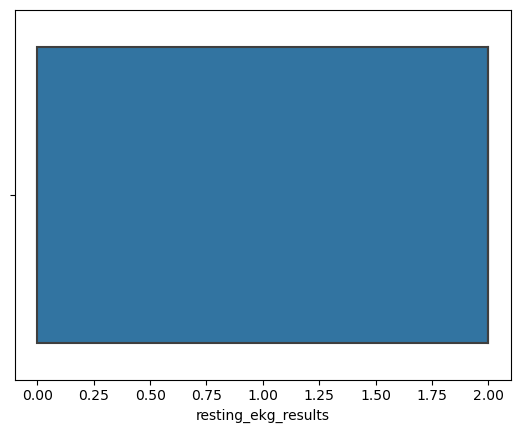

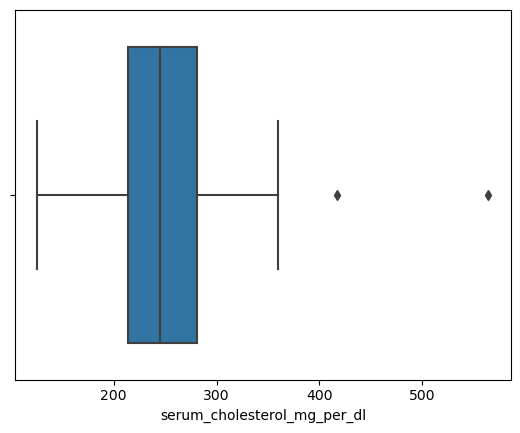

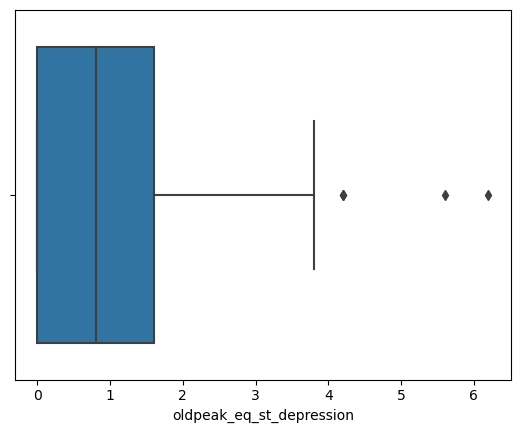

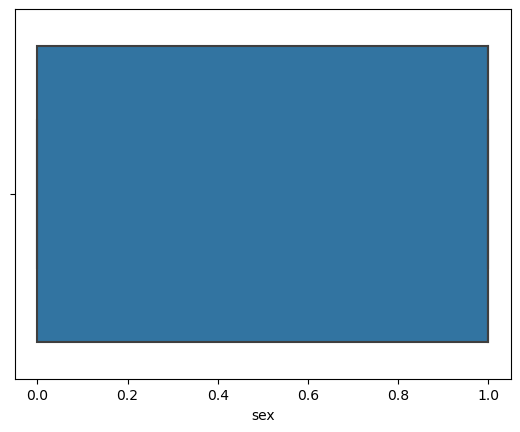

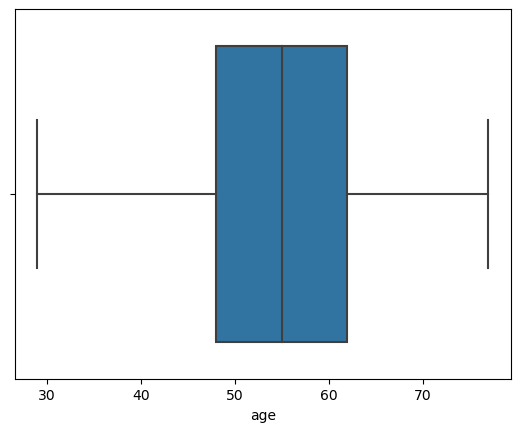

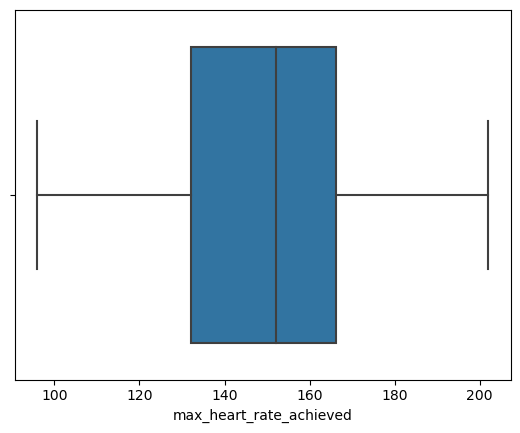

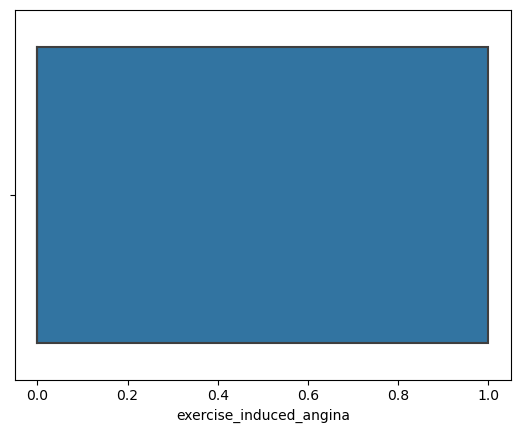

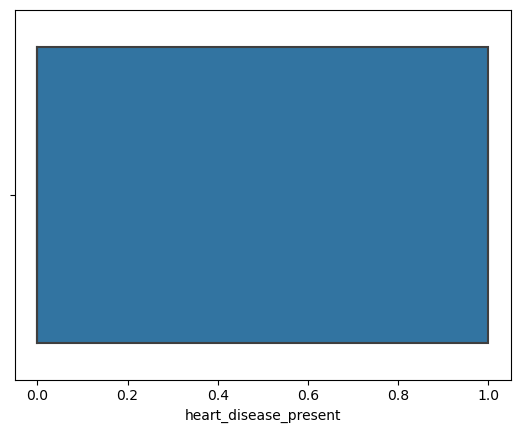

In [138]:
#checking outliers use  boxplot
col=data.select_dtypes(include=['int','float'])
for i in col:
    sns.boxplot(data,x=i)
    plt.show()

Insight:

1.the resting_blood_pressure have outliers 
2.the colum serum_cholesterol_mg_per_dl have outliers
3.the oldpeak_eq_st_depression	have outliers

###  5.3.1 resting_blood_pressure handling outliers 

In [139]:
# Checking for upper and lower limit by InterQuartileRange method
#finding the limits 
Q1=data['resting_blood_pressure'].quantile(0.25)
Q3=data['resting_blood_pressure'].quantile(0.75)
IQR=Q3-Q1
Lower_limit=Q1-(1.5*IQR)
Upper_limit=Q3+(1.5*IQR)
print('Lower limit',Lower_limit)
print('Upper limit',Upper_limit)

Lower limit 90.0
Upper limit 170.0


In [140]:
#printing the outliers
data.loc[(data['resting_blood_pressure']>170) | (data['resting_blood_pressure']<90)]

patient_id  slope_of_peak_exercise_st_segment               thal  \
4       oyt4ek                                  3  reversible_defect   
33      0n5fu0                                  1             normal   
72      qwj1yf                                  1  reversible_defect   
75      4v0q7o                                  2  reversible_defect   
113     sqddbc                                  2  reversible_defect   
176     2s2b1f                                  2             normal   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
4                       178                1                  0   
33                      180                4                  0   
72                      172                3                  0   
75                      178                4                  2   
113                     180                3                  0   
176                     180                4                  0   

     fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
4                                       0                    2   
33                                      0                    0   
72                                      1                    0   
75                                      1                    0   
113                                     1                    2   
176                                     0                    1   

     serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
4                            270                       4.2    1   59   
33                           325                       0.0    0   64   
72                           199                       0.5    1   52   
75                           228                       1.0    0   66   
113                          274                       1.6    1   68   
176                          327                       3.4    0   55   

     max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
4                        145                        0                      0  
33                       154                        1                      0  
72                       162                        0                      0  
75                       165                        1                      1  
113                      150                        1                      1  
176                      117                        1                      1

In [141]:
#capping -change the outlier values to upperor lower limit values
data.loc[data['resting_blood_pressure']>Upper_limit,'resting_blood_pressure']=Upper_limit
data.loc[data['resting_blood_pressure']<Lower_limit,'resting_blood_pressure']=Lower_limit

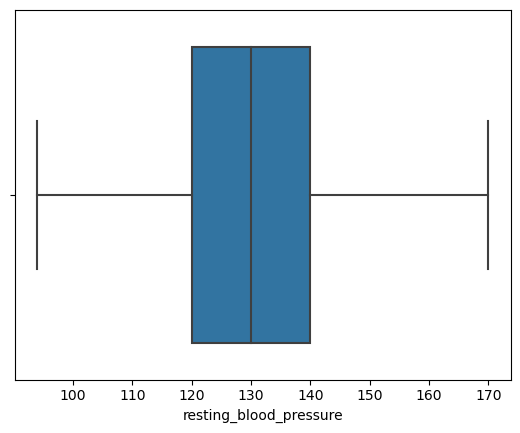

In [142]:
# visualizing resting_blood_pressure after handling outliers 
sns.boxplot(data,x='resting_blood_pressure')
plt.show()

###  5.3.1 serum_cholesterol_mg_per_dl handling outliers


In [143]:
# Checking for upper and lower limit by InterQuartileRange method
#finding the limits 
Q1=data['serum_cholesterol_mg_per_dl'].quantile(0.25)
Q3=data['serum_cholesterol_mg_per_dl'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("lower_limit",lower_limit)
print("Upper_limit",upper_limit)

lower_limit 112.5
Upper_limit 382.5


In [144]:
#printing the outliers 
data.loc[(data['serum_cholesterol_mg_per_dl']>upper_limit)|(data['serum_cholesterol_mg_per_dl']<lower_limit)]

patient_id  slope_of_peak_exercise_st_segment               thal  \
43     yx0q6k                                  1             normal   
60     rv6siv                                  2  reversible_defect   

    resting_blood_pressure  chest_pain_type  num_major_vessels  \
43                     140                3                  1   
60                     115                3                  0   

    fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
43                                     1                    2   
60                                     0                    2   

    serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
43                          417                       0.8    0   65   
60                          564                       1.6    0   67   

    max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
43                      157                        0                      0  
60                      160                        0                      0

In [145]:
#capping -change the outlier values to upperor lower limit values
data.loc[data['serum_cholesterol_mg_per_dl']>Upper_limit,'serum_cholesterol_mg_per_dl']=Upper_limit

In [146]:
# visualizing rserum_cholesterol_mg_per_dl after handling outliers 
data.loc[(data['serum_cholesterol_mg_per_dl']>upper_limit)|(data['serum_cholesterol_mg_per_dl']<lower_limit)]

Empty DataFrame
Columns: [patient_id, slope_of_peak_exercise_st_segment, thal, resting_blood_pressure, chest_pain_type, num_major_vessels, fasting_blood_sugar_gt_120_mg_per_dl, resting_ekg_results, serum_cholesterol_mg_per_dl, oldpeak_eq_st_depression, sex, age, max_heart_rate_achieved, exercise_induced_angina, heart_disease_present]
Index: []

### 5.3.3 oldpeak_eq_st_depression handling outliers

In [147]:
# Checking for upper and lower limit by InterQuartileRange method
#finding the limits 
Q1=data['oldpeak_eq_st_depression'].quantile(0.25)
Q3=data['oldpeak_eq_st_depression'].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
print("lower_limit",lower_limit)
print("Upper_limit",upper_limit)

lower_limit -2.4000000000000004
Upper_limit 4.0


In [148]:
#printing the outliers 
data.loc[(data['oldpeak_eq_st_depression']>upper_limit)|(data['oldpeak_eq_st_depression']<lower_limit)]

patient_id  slope_of_peak_exercise_st_segment               thal  \
4       oyt4ek                                  3  reversible_defect   
112     6r9x2j                                  2  reversible_defect   
140     noxsnw                                  3  reversible_defect   
162     usnkhx                                  3  reversible_defect   

     resting_blood_pressure  chest_pain_type  num_major_vessels  \
4                       170                1                  0   
112                     140                4                  3   
140                     140                4                  0   
162                     160                4                  3   

     fasting_blood_sugar_gt_120_mg_per_dl  resting_ekg_results  \
4                                       0                    2   
112                                     0                    0   
140                                     0                    0   
162                                     0                    2   

     serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  sex  age  \
4                            170                       4.2    1   59   
112                          170                       4.2    1   51   
140                          170                       5.6    1   55   
162                          164                       6.2    0   62   

     max_heart_rate_achieved  exercise_induced_angina  heart_disease_present  
4                        145                        0                      0  
112                      122                        1                      1  
140                      111                        1                      1  
162                      145                        0                      1

In [149]:
#capping -change the outlier values to upperor lower limit values
data.loc[data['oldpeak_eq_st_depression']>4]=upper_limit

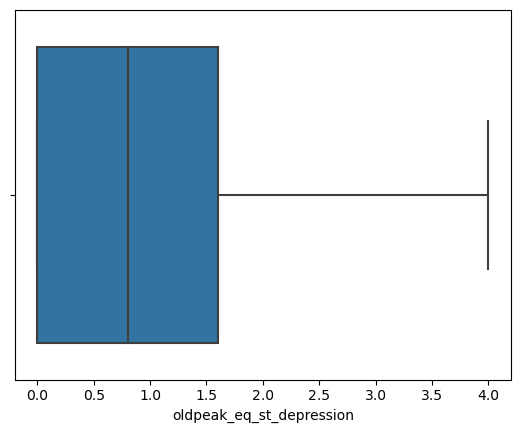

In [150]:
# visualizing resting_blood_pressure after handling outliers 
sns.boxplot(data,x='oldpeak_eq_st_depression')
plt.show()

Insight:

since the outliers are detected in this data and we did'nt remove any outlier here we impute the outliers with upper_limit values .

## 5.4 Encoding 

In [34]:
## 5.4 Converting categorical value into numerical value

 Insight:
    
    In this data we have two categorical columns which are patient_id , thal  here
    Patient_id column is haing more unique values and patient_id feature is not a important feature for 
    the model so we just encoding the thal column and drop the patient_id.

### 5.4.1 Encoding thal column

In [151]:
#the thal variable have float value in it and we have to convert the thal variable into object
data['thal'] = data['thal'].astype(str)

In [152]:
#encoding the thal column with label encoder
#initializing the label encoder
LE=LabelEncoder()
data['thal_encoder']=LE.fit_transform(data['thal'])

In [153]:
#drop the thal feature after encoded 
data.drop('thal',axis=1,inplace=True)

## 5.5 Scaling

In [154]:
#scaling continues variable 
#initializing the minmaxscaler
MMS=MinMaxScaler()

In [155]:
# Fit and tranforming all other columns for scaling the values
minmaxscaled_columns=MMS.fit_transform(data[["resting_blood_pressure",'age','max_heart_rate_achieved']])
 

In [156]:
# Creating Dataframe for Scaled columns
minmaxscaled_columns_df=pd.DataFrame(minmaxscaled_columns,columns=['resting_blood_pressure','age','max_heart_rate_achieved']
)
 

In [157]:
#transfer the data with scaled columns
data['resting_blood_pressure']=minmaxscaled_columns_df['resting_blood_pressure']
data['age']=minmaxscaled_columns_df['age']
data['max_heart_rate_achieved']=minmaxscaled_columns_df['max_heart_rate_achieved']

## 5.6 Removing corrupted data

In [158]:
#the target variable heart_disease_present is have value 4
data.loc[data['heart_disease_present']==4]

patient_id  slope_of_peak_exercise_st_segment  resting_blood_pressure  \
4          4.0                                  4                     0.0   
112        4.0                                  4                     0.0   
140        4.0                                  4                     0.0   
162        4.0                                  4                     0.0   

     chest_pain_type  num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  \
4                  4                  4                                     4   
112                4                  4                                     4   
140                4                  4                                     4   
162                4                  4                                     4   

     resting_ekg_results  serum_cholesterol_mg_per_dl  \
4                      4                            4   
112                    4                            4   
140                    4                            4   
162                    4                            4   

     oldpeak_eq_st_depression  sex  age  max_heart_rate_achieved  \
4                         4.0    4  0.0                      0.0   
112                       4.0    4  0.0                      0.0   
140                       4.0    4  0.0                      0.0   
162                       4.0    4  0.0                      0.0   

     exercise_induced_angina  heart_disease_present  thal_encoder  
4                          4                      4             0  
112                        4                      4             0  
140                        4                      4             0  
162                        4                      4             0

In [159]:
#removing corrupted values in the variable
data = data.drop(data[data['heart_disease_present'] == 4].index)


In [160]:
#checking the value_counts for the heart_diseaase_present
data.heart_disease_present.value_counts()

heart_disease_present
0    99
1    77
Name: count, dtype: int64

## 5.6 feature selection

Insights
 
 the patient_id column have more unique value and the patient_id is not a important featrue for over model ,so,we drop the patient_id

In [161]:
#dropping patiant_id
data.drop('patient_id',axis=1,inplace=True)

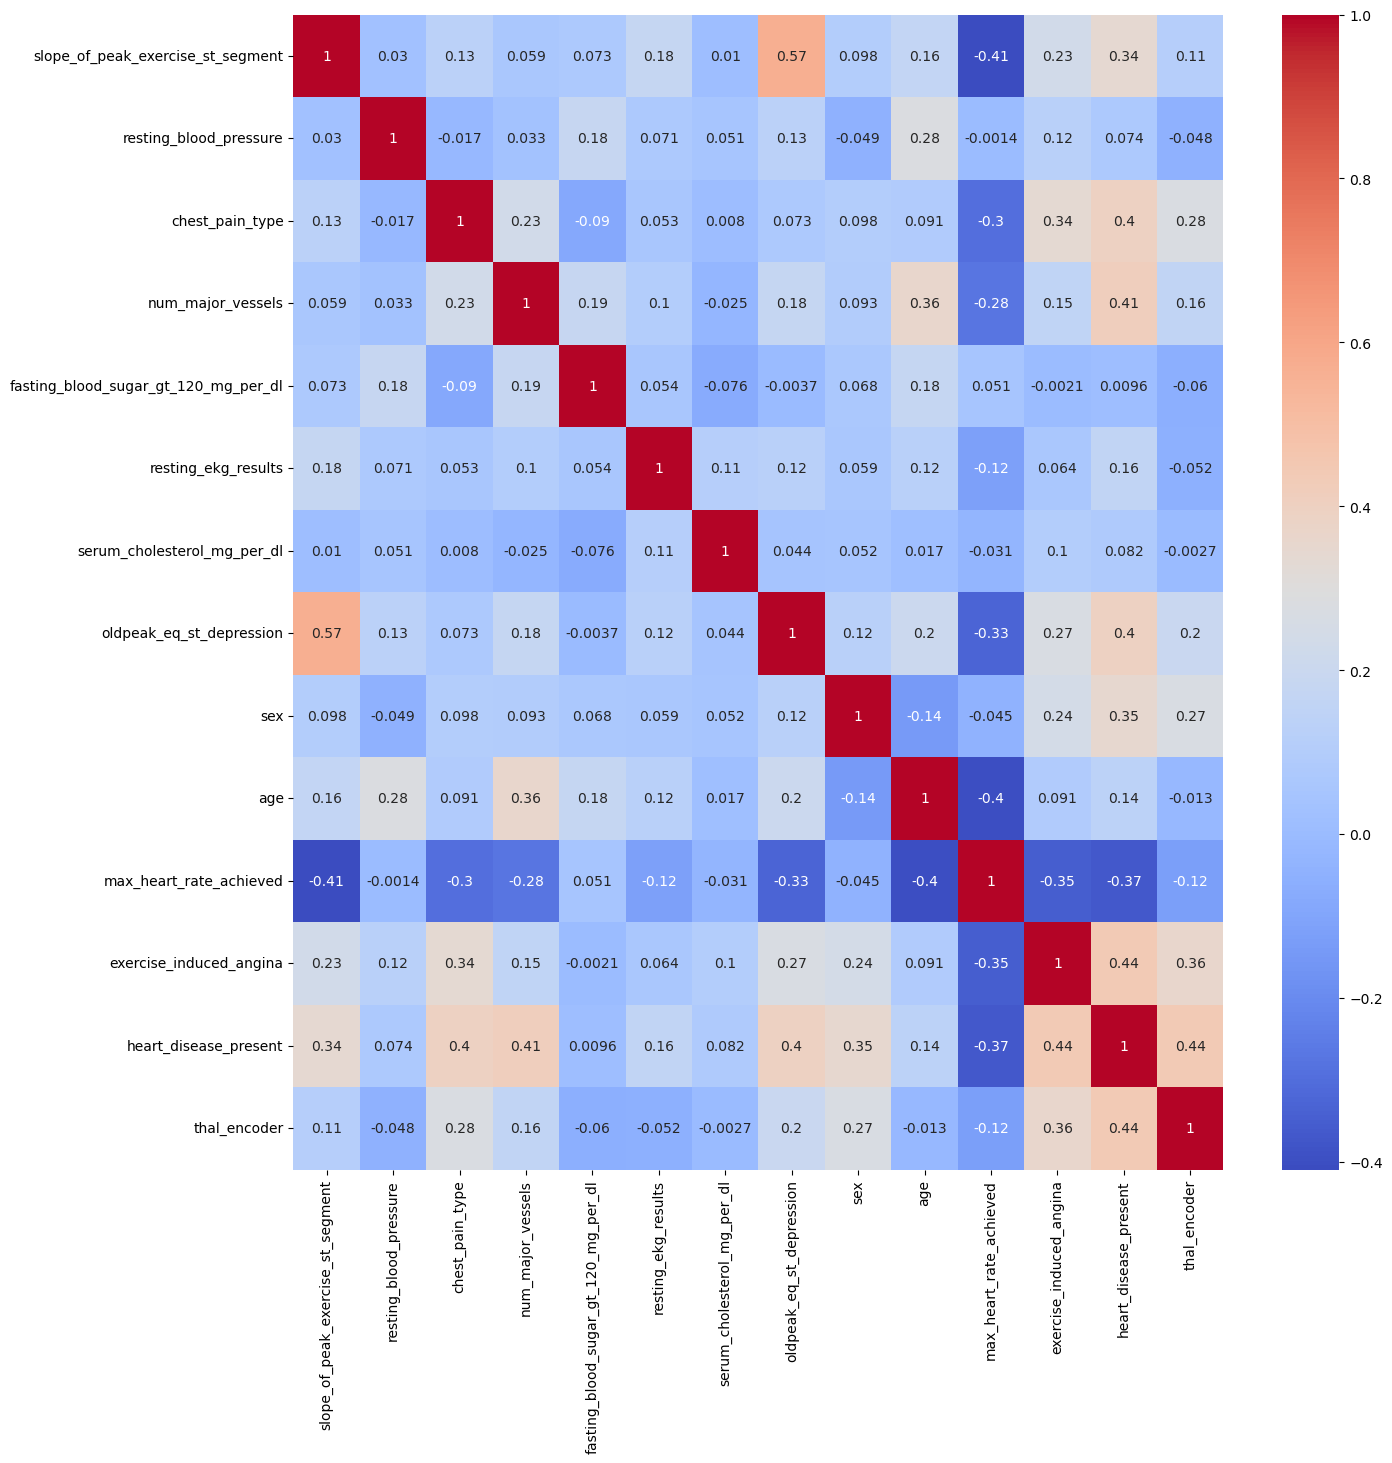

In [32]:
# plotting heatmap to look for correalations in the dataset
plt.figure(figsize = (15,15))
sns.heatmap(data=data.corr(),annot=True,cmap='coolwarm')
plt.show()

Insights:

1.Positively correlated with serum cholesterol (0.755843).

2.Negatively correlated with fasting blood sugar (-0.576072).

3.Strongly correlated with exercise-induced angina (0.753712).

4.Positively correlated with slope of peak exercise ST segment (0.584892).

5.Positively correlated with resting blood pressure (0.755843).

6.Negatively correlated with fasting blood sugar (-0.832316).

In [162]:
#final data before splitting
data.head()

slope_of_peak_exercise_st_segment  resting_blood_pressure  chest_pain_type  \
0                                  1                0.746988                2   
1                                  2                0.638554                3   
2                                  1                0.728916                4   
3                                  1                0.891566                4   
5                                  1                0.759036                3   

   num_major_vessels  fasting_blood_sugar_gt_120_mg_per_dl  \
0                  0                                     0   
1                  0                                     0   
2                  3                                     0   
3                  0                                     0   
5                  0                                     0   

   resting_ekg_results  serum_cholesterol_mg_per_dl  oldpeak_eq_st_depression  \
0                    2                          170                       0.0   
1                    0                          170                       1.6   
2                    2                          170                       0.0   
3                    0                          170                       0.0   
5                    0                          170                       0.0   

   sex       age  max_heart_rate_achieved  exercise_induced_angina  \
0    1  0.561644                 0.838384                        0   
1    0  0.684932                 0.777778                        0   
2    1  1.000000                 0.797980                        1   
3    1  0.493151                 0.893939                        0   
5    1  0.520548                 0.737374                        0   

   heart_disease_present  thal_encoder  
0                      0             2  
1                      0             2  
2                      1             2  
3                      1             3  
5                      0             2

## 6.Data Splitting

In [163]:
# Extracting features from the data
X=data.drop('heart_disease_present',axis=1)

In [164]:
# Extracting target from the data
y=data['heart_disease_present']

In [206]:
#  value_counts for heart_disease_present column
class_counts = data['heart_disease_present'].value_counts()
print(class_counts)

heart_disease_present
0    99
1    77
Name: count, dtype: int64


In [207]:
# Calculate the imbalance ratio
imbalance_ratio = class_counts.min() / class_counts.max()
print(f'Imbalance Ratio: {imbalance_ratio:.2f}')

Imbalance Ratio: 0.78


Insights :
    
     we  have Imbalance Ratio of  0.78 in our target column ,since it is relatively balance but not perfect ,
     we are going to do smote technic to balance the data for better performance for model like
     logistic regression.

In [165]:
# Splitting training and testing data
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=48)

In [166]:
#importing and  Initializing SMOTE
from imblearn.over_sampling import SMOTE 
smote=SMOTE(random_state=48)

In [167]:
# fitting and resampling training data
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [168]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(154, 13)
(154,)


## 7.Model Creation

### 7.1. LOGISTIC REGRESSION

In [169]:
# Initializing LogisticRegression model
model=LogisticRegression()

# Fitting the training data to the Logistic Regression model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.77      0.71      0.74        14

    accuracy                           0.81        36
   macro avg       0.80      0.79      0.79        36
weighted avg       0.80      0.81      0.80        36



In [170]:
# Evaluating the LogisticRegression model's performance by accuracy_score
print('The accuracy score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy score is  0.8055555555555556


col_0                   0   1
heart_disease_present        
0                      19   3
1                       4  10

### 7.1.1  Hyperparameter tuning for Logistic Regression

In [178]:
# Initializing LogisticRegression model
model_ht=LogisticRegression()

# Creating a dictionary with possible Hyperparameters
params={'penalty' : ['l1', 'l2', 'elasticnet'],
        'fit_intercept':[True,False],
        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'random_state': list(range(0,48))
       }

# Initializing GridSearchCV
logistic_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        verbose=3)

# Fitting the training data to the GridSearchCV
logistic_cv.fit(x_train_smote,y_train_smote)


Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=3)

In [153]:
# Getting best hyperparameters
logistic_cv.best_params_

{'fit_intercept': True, 'penalty': 'l2', 'random_state': 8, 'solver': 'saga'}

### 7.1.2 best logisticRegression model

In [171]:
# Initializing LogisticRegression model
LogisticRegression_model=LogisticRegression(penalty='l2',fit_intercept=True,random_state=8,solver='saga')

# Fitting the training data to the Logistic Regression model
LogisticRegression_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=LogisticRegression_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.79      0.79      0.79        14

    accuracy                           0.83        36
   macro avg       0.82      0.82      0.82        36
weighted avg       0.83      0.83      0.83        36



In [172]:
# Evaluating the LogisticRegression model's performance by accuracy_score
print('The  accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The  accuracy_score is  0.8333333333333334


col_0                   0   1
heart_disease_present        
0                      19   3
1                       3  11

In [173]:
# accuracy_score for LogisticRegression model
LogisticRegression_accuracy_score=accuracy_score(y_test,y_pred)

### 7.2. K NEIGHBORS CLASSIFIER

In [174]:
# Initializing KNeighborsClassifier model
model=KNeighborsClassifier()

# Fitting the training data to the KNeighborsClassifier model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.82      0.64      0.72        14

    accuracy                           0.81        36
   macro avg       0.81      0.78      0.79        36
weighted avg       0.81      0.81      0.80        36



In [175]:
# Evaluating the KNeighborsClassifier model's performance by accuracy_score
print('The accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score is  0.8055555555555556


col_0                   0  1
heart_disease_present       
0                      20  2
1                       5  9

###  7.2.1  Hyperparameter tuning for KNeighborsClassifier

In [159]:
# Initializing KNeighborsClassifier model
model_ht=KNeighborsClassifier()

# Creating a dictionary with possible Hyperparameters
params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Initializing GridSearchCV
KNN_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=2,
                        verbose=3)

# Fitting the training data to the GridSearchCV
KNN_cv.fit(x_train_smote,y_train_smote) 

Fitting 2 folds for each of 42 candidates, totalling 84 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [160]:
# Getting best hyperparameters
KNN_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

### 7.2.2  Best KNeighborsClassifier model

In [176]:
# Initializing KNeighborsClassifier model
KNeighborsClassifier_model=KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='manhattan')

# Fitting the training data to the KNeighborsClassifier model
KNeighborsClassifier_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=KNeighborsClassifier_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.82      0.64      0.72        14

    accuracy                           0.81        36
   macro avg       0.81      0.78      0.79        36
weighted avg       0.81      0.81      0.80        36



In [177]:
# Evaluating the KNeighborsClassifier model's performance by  accuracy_score
print('The accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score is  0.8055555555555556


col_0                   0  1
heart_disease_present       
0                      20  2
1                       5  9

In [178]:
# accuracy_score for KNeighborsClassifier model
KNeighborsClassifier_accuracy_score=accuracy_score(y_test,y_pred)

### 7.3  SUPPORT VECTOR MACHINE 

In [179]:
# Initializing SVC model
model=SVC()

# Fitting the training data to the SVC model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.39      1.00      0.56        14

    accuracy                           0.39        36
   macro avg       0.19      0.50      0.28        36
weighted avg       0.15      0.39      0.22        36



In [180]:
# Evaluating the SVC model's performance by  accuracy_score
print('Theaccuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

Theaccuracy_score is  0.3888888888888889


col_0                   1
heart_disease_present    
0                      22
1                      14

#### 7.3.1 Hyperparameter tuning for Support Vector Machine

In [179]:
# Initializing SVC model
model_ht=SVC()

# Creating a dictionary with possible Hyperparameters
params={'kernel' : ['linear', 'rbf', 'sigmoid'],
        'gamma' : ['scale', 'auto'],
        'random_state': list(range(0,48))
       }

# Initializing GridSearchCV
svm_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                    cv=2,
                        verbose=3)

# Fitting the training data to the GridSearchCV
svm_cv.fit(x_train_smote,y_train_smote)

Fitting 2 folds for each of 288 candidates, totalling 576 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid'],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             scoring='accuracy', verbose=3)

In [182]:
# Getting best hyperparameters
svm_cv.best_params_

{'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}

#### 7.3.2. Best SVC model

In [181]:
# Initializing SVC model
SVC_model=SVC(gamma='auto',kernel='rbf',random_state=0)

# Fitting the training data to the SVC model
SVC_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=SVC_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        22
           1       0.83      0.71      0.77        14

    accuracy                           0.83        36
   macro avg       0.83      0.81      0.82        36
weighted avg       0.83      0.83      0.83        36



In [182]:
# Evaluating the SVC model's performance by accuracy_score
print('The accuracy_scoreis ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_scoreis  0.8333333333333334


col_0                   0   1
heart_disease_present        
0                      20   2
1                       4  10

In [183]:
# accuracy_score for SVC model
SVC_accuracy_score=accuracy_score(y_test,y_pred)

### 7.4. DECISION TREE  

In [184]:
# Initializing DecisionTreeClassifier model
model=DecisionTreeClassifier()

# Fitting the training data to the DecisionTreeClassifier model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76        22
           1       0.62      0.57      0.59        14

    accuracy                           0.69        36
   macro avg       0.68      0.67      0.67        36
weighted avg       0.69      0.69      0.69        36



In [185]:
# Evaluating the DecisionTreeClassifier model's performance by accuracy_score
print('The accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score is  0.6944444444444444


col_0                   0  1
heart_disease_present       
0                      17  5
1                       6  8

### 7.4.1. Hyperparameter tuning for Decision Tree

In [181]:
# Initializing DecisionTreeClassifier model
model_ht=DecisionTreeClassifier()

# Creating a dictionary with possible Hyperparameters
params={'criterion' : ["gini",'entropy'],
        'splitter' : [ "random",'best'],
        'max_depth': list(range(0,20)),
        'min_samples_split':list(range(0,5)),
        'min_samples_leaf':list(range(0,5)),
        'random_state': list(range(0,48))
       }

# Initializing GridSearchCV
tree_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=2,
                        verbose=3)

# Fitting the training data to the GridSearchCV
tree_cv.fit(x_train_smote,y_train_smote)

Fitting 2 folds for each of 96000 candidates, totalling 192000 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'splitter': ['random', 'best']},
             scoring='accuracy', verbose=3)

In [183]:
# Getting best hyperparameters
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 45,
 'splitter': 'random'}

#### 7.4.2. Best DecisionTreeClassifier model

In [186]:
# Initializing DecisionTreeClassifier model
DecisionTreeClassifier_model=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=2,min_samples_split=2 ,splitter='random',random_state=45)

# Fitting the training data to the DecisionTreeClassifier model
DecisionTreeClassifier_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=DecisionTreeClassifier_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.75      0.64      0.69        14

    accuracy                           0.78        36
   macro avg       0.77      0.75      0.76        36
weighted avg       0.78      0.78      0.77        36



In [187]:
# Evaluating the DecisionTreeClassifier model's performance by accuracy_score
print('The accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score is  0.7777777777777778


col_0                   0  1
heart_disease_present       
0                      19  3
1                       5  9

In [188]:
# accuracy_score for De model
DecisionTreeClassifier_accueacy_score=accuracy_score(y_test,y_pred)

### 9.5. RANDOM FOREST

In [189]:
# Initializing RandomForestClassifier model
model=RandomForestClassifier()

# Fitting the training data to the RandomForestClassifier model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.75      0.64      0.69        14

    accuracy                           0.78        36
   macro avg       0.77      0.75      0.76        36
weighted avg       0.78      0.78      0.77        36



In [190]:
# Evaluating the RandomForestClassifier model's performance by accuracy_score
print('The accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The accuracy_score is  0.7777777777777778


col_0                   0  1
heart_disease_present       
0                      19  3
1                       5  9

#### 7.5.1. Hyperparameter tuning for Random Forest

In [66]:
# Initializing RandomForestClassifier model
model_ht=RandomForestClassifier()

# Creating a dictionary with possible Hyperparameters
params={'n_estimators':[100,200,300,400,500],
        'max_depth': [5,10,15,20],
        'min_samples_split': [1,3,5],
        'min_samples_leaf':[1,3,5],
        'random_state': [1,12,22,33,44,48],
       }

# Initializing GridSearchCV
forest_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=2,
                        verbose=3)

# Fitting the training data to the GridSearchCV
forest_cv.fit(x_train_smote,y_train_smote)


Fitting 2 folds for each of 1080 candidates, totalling 2160 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [1, 3, 5],
                         'n_estimators': [100, 200, 300, 400, 500],
                         'random_state': [1, 12, 22, 33, 44, 48]},
             scoring='accuracy', verbose=3)

In [67]:
# Getting best hyperparameters
forest_cv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 300,
 'random_state': 44}

### 7.5.2. Best RandomForestClassifier model

In [191]:
# Initializing RandomForestClassifier model
RandomForestClassifier_model=RandomForestClassifier(n_estimators=300,min_samples_leaf=3,min_samples_split=3,max_depth=5,random_state=44)

# Fitting the training data to the RandomForestClassifier model
RandomForestClassifier_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=RandomForestClassifier_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.77      0.71      0.74        14

    accuracy                           0.81        36
   macro avg       0.80      0.79      0.79        36
weighted avg       0.80      0.81      0.80        36



In [192]:
# Evaluating the RandomForestClassifier model's performance by  accuracy_score
print('The  accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The  accuracy_score is  0.8055555555555556


col_0                   0   1
heart_disease_present        
0                      19   3
1                       4  10

In [193]:
# accuracy_score for RandomForestClassifier model
RandomForestClassifier_accuracy_score=accuracy_score(y_test,y_pred)

### 7.6. ARTIFICIAL NEURAL NETWORK  

In [194]:
# Initializing MLPClassifier model
model=MLPClassifier()

# Fitting the training data to the MLPClassifier model
model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.77      0.71      0.74        14

    accuracy                           0.81        36
   macro avg       0.80      0.79      0.79        36
weighted avg       0.80      0.81      0.80        36



In [195]:
# Evaluating the MLPClassifier model's performance by accuracy_score
print('Theaccuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

Theaccuracy_score is  0.8055555555555556


col_0                   0   1
heart_disease_present        
0                      19   3
1                       4  10

#### 7.6.1. Hyperparameter tuning for Artificial Neural Network

In [73]:
# Initializing MLPClassifier model
model_ht=MLPClassifier()

# Creating a dictionary with possible Hyperparameters
params={'hidden_layer_sizes':[(100,),(200,),(300,),(400,),(500,),(1000,)],
        'solver' : ['lbfgs', 'sgd', 'adam'],
        'learning_rate_init':[0.001,0.01,0.1,1],
        'random_state': list(range(0,48))
       }

# Initializing GridSearchCV
ann_cv=GridSearchCV(estimator=model_ht,
                        param_grid=params,
                        scoring='accuracy',
                        n_jobs=-1,
                        cv=2,
                        verbose=3)

# Fitting the training data to the GridSearchCV
ann_cv.fit(x_train_smote,y_train_smote)


Fitting 2 folds for each of 3456 candidates, totalling 6912 fits


GridSearchCV(cv=2, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(100,), (200,), (300,), (400,),
                                                (500,), (1000,)],
                         'learning_rate_init': [0.001, 0.01, 0.1, 1],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy', verbose=3)

In [74]:
# Getting best hyperparameters
ann_cv.best_params_

{'hidden_layer_sizes': (100,),
 'learning_rate_init': 0.001,
 'random_state': 8,
 'solver': 'adam'}

### 7.6.2. Best MLPClassifier model

In [196]:
# Initializing MLPClassifier model
MLPClassifier_model=MLPClassifier(hidden_layer_sizes=(100,),learning_rate_init=0.001,solver='adam',random_state=8)

# Fitting the training data to the MLPClassifier model
MLPClassifier_model.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=MLPClassifier_model.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.77      0.71      0.74        14

    accuracy                           0.81        36
   macro avg       0.80      0.79      0.79        36
weighted avg       0.80      0.81      0.80        36



In [80]:
# Evaluating the MLPClassifier model's performance by accuracy_score
print('The  accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The  accuracy_score is  0.8055555555555556


col_0                   0   1
heart_disease_present        
0                      19   3
1                       4  10

In [197]:
# accuracy_score for MLPClassifier model
MLPClassifier_accuracy_score=accuracy_score(y_test,y_pred)

### 7.7 GradientBoostingClassifier

In [198]:
#initializing GradientBoostclassifier
GBC=GradientBoostingClassifier()   

# Fitting the training data to the GradientBoostClassifier model
GBC.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=GBC.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.71      0.71      0.71        14

    accuracy                           0.78        36
   macro avg       0.77      0.77      0.77        36
weighted avg       0.78      0.78      0.78        36



In [199]:
# Evaluating the GradientBoostingClassifier model's performance by accuracy_score
print('The  accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The  accuracy_score is  0.7777777777777778


col_0                   0   1
heart_disease_present        
0                      18   4
1                       4  10

#### 7.7.1 Hyperparameter tuning for  GradientBoostingClassifier

In [88]:
#initializing GradientBoostclassifier
model_ht=GradientBoostingClassifier()  

# Creating a dictionary with possible Hyperparameters
param_grid ={
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

# Initializing GridSearchCV
rcv=GridSearchCV(estimator=model_ht,
                 scoring='accuracy',
                 param_grid=param_grid,
                 cv=5,
                 verbose=2,
                 n_jobs=-1)

# Fitting the training data to the GridSearchCV
rcv.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [89]:
# Getting best hyperparameters
rcv.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [200]:
#initializing GradientBoostclassifier
GBC=GradientBoostingClassifier(learning_rate= 0.05,max_depth= 5,max_features= 'log2',min_samples_leaf= 2,
                               min_samples_split= 2,n_estimators=100,subsample=1.0)   

# Fitting the training data to the GradientBoostClassifier model
GBC.fit(x_train_smote,y_train_smote)

# predicting the target for testing data
y_pred=GBC.predict(x_test)

# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.71      0.71      0.71        14

    accuracy                           0.78        36
   macro avg       0.77      0.77      0.77        36
weighted avg       0.78      0.78      0.78        36



In [201]:
# Evaluating the GradientBoostingClassifier model's performance by accuracy_score
print('The  accuracy_score is ',accuracy_score(y_test,y_pred))

# Pandas crosstab function for visualizing actual and predicted counts 
pd.crosstab(y_test,y_pred)

The  accuracy_score is  0.7777777777777778


col_0                   0   1
heart_disease_present        
0                      18   4
1                       4  10

In [202]:
# accuracy_score forGradientBoostingClassifier model
GradientBoostingClassifier_accuracy_score=accuracy_score(y_test,y_pred)

## 8.MODEL COMPARISON REPORT

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


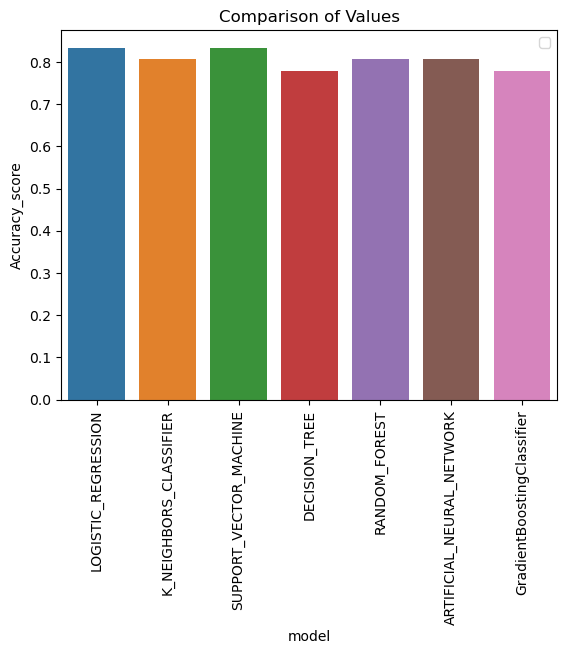

In [203]:
# Creating a dictionary for the model and their corresponding to the accuracy_score
comparison_dict={
    'model':['LOGISTIC_REGRESSION','K_NEIGHBORS_CLASSIFIER','SUPPORT_VECTOR_MACHINE','DECISION_TREE','RANDOM_FOREST',
             "ARTIFICIAL_NEURAL_NETWORK",'GradientBoostingClassifier'],
      'Accuracy_score':[LogisticRegression_accuracy_score,KNeighborsClassifier_accuracy_score,
                        SVC_accuracy_score,DecisionTreeClassifier_accueacy_score,
                        RandomForestClassifier_accuracy_score,MLPClassifier_accuracy_score,
                        GradientBoostingClassifier_accuracy_score]}

# Creating dataframe 
comparison_df=pd.DataFrame(comparison_dict)




#visualizing the Comparison_df dataframe
sns.barplot(x='model', y='Accuracy_score', data=comparison_df )
plt.xlabel('model')
plt.ylabel('Accuracy_score')
plt.title('Comparison of Values')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [204]:
# Creating a dictionary for the model and their corresponding to the accuracy_score
comp_dict={
    'model':['LOGISTIC_REGRESSION','K_NEIGHBORS_CLASSIFIER','SUPPORT_VECTOR_MACHINE','DECISION_TREE','RANDOM_FOREST',
             "ARTIFICIAL_NEURAL_NETWORK",'GradientBoostingClassifier'],
      'Accuracy_score':[LogisticRegression_accuracy_score,KNeighborsClassifier_accuracy_score,
                        SVC_accuracy_score,DecisionTreeClassifier_accueacy_score,
                        RandomForestClassifier_accuracy_score,MLPClassifier_accuracy_score,
                        GradientBoostingClassifier_accuracy_score]}
# Creating dataframe 
comp_df=pd.DataFrame(comp_dict)

#sorting the dataframe by the r2_score column in descending order
comp_df=comp_df.sort_values(by='Accuracy_score', ascending=False)

# Setting the index as the model column
comp_df=comp_df.set_index('model')

# Visualizing the dataframe
print('The DataFrame showing performance of different models:')
print("")
print(comp_df)

The DataFrame showing performance of different models:

                            Accuracy_score
model                                     
LOGISTIC_REGRESSION               0.833333
SUPPORT_VECTOR_MACHINE            0.833333
K_NEIGHBORS_CLASSIFIER            0.805556
RANDOM_FOREST                     0.805556
ARTIFICIAL_NEURAL_NETWORK         0.805556
DECISION_TREE                     0.777778
GradientBoostingClassifier        0.777778


## Recommendations to the Hospital for Heart Disease Prevention
### 1. Risk Factors Analysis:
Identify and analyze the most significant risk factors contributing to the occurrence of heart diseases based on the insights derived from the data analysis and machine learning model. Understand the relationships between various features and the likelihood of heart diseases.


### 2. Early Detection Strategies:
Propose strategies for early detection of potential heart diseases in individuals. This could involve leveraging the identified high-risk factors to create targeted screening programs or regular check-ups for patients with specific risk profiles.


### 3. Patient Education:
Suggest educational programs and materials for patients to raise awareness about heart health. Provide information on lifestyle changes, dietary habits, and the importance of regular health check-ups to empower individuals to take proactive measures for heart disease prevention.


### 4. Integration of Predictions into Healthcare System:
Recommend integrating the developed machine learning model into the hospital's healthcare system. This allows for real-time predictions and risk assessments, enabling healthcare professionals to make timely and informed decisions during patient interactions.


### 5. Continuous Monitoring:
Emphasize the importance of continuous monitoring of the model's performance. Regularly update the model with new data to ensure its accuracy and relevance over time. Establish protocols for model maintenance and retraining to adapt to evolving trends in heart disease risk factors.


### 6. Collaboration with Health Professionals:
Encourage collaboration between data scientists and healthcare professionals. Foster a multidisciplinary approach that combines data-driven insights with the expertise of medical professionals. This collaboration ensures a comprehensive and holistic strategy for heart disease prevention and patient care.


### 7. Community Engagement:
Suggest community engagement initiatives to promote heart health at a broader level. Organize awareness campaigns, workshops, or seminars to reach a wider audience and encourage community members to adopt heart-healthy lifestyles.


### 8. Feedback Mechanism:
Establish a feedback mechanism for healthcare professionals to provide insights into the practical application of the model. Gather feedback on the model's effectiveness in clinical settings and use this information to make continuous improvements.


### 9. Regulatory Compliance:
Ensure that the implementation of the predictive model complies with relevant healthcare regulations and data privacy standards. Prioritize patient confidentiality and data security in the integration process.


### 10. Evaluation and Adjustment:
Define metrics for evaluating the success of the heart disease prevention strategies. Regularly assess the impact of implemented measures and be prepared to adjust the approach based on ongoing evaluations and feedback.

By addressing these aspects, the hospital can develop a comprehensive and effective strategy for preventing heart diseases, combining data-driven insights with practical healthcare solutions.

## CONCLUSION

1.In this Dataset we have 15 columns two categorical columns and thriteen numerical column

2.we done here basic checks and EDA to completely analyis the data 

3.In preprocessing we did encoding for thal column and handled outliers 

4.we train this data with seven model and we get a maximun accuracy score of 83% in Logistic regression and support vector   machine

We conclude that the best model for this heart disease predict dataset is Logistic regression and support vector   machine

## 9. REPORT ON CHALLENGES FACED

1.the dataset had a imbalance target  variable and we applied SMOTE to balance the data

2.Initially it is hard to understand the data and feature that related to heart disease.

3.some features were not directly useble for building  model for that we did label encoding for categorical data and
  scaling for numerical data.

4.finding thye optimal hyperparameters for each model for that we use gridsearchcv  for hyperparameter tuning

# Project Details:
### Project Team ID:
PTID-CDS-JAN-25-2367
    
### Project ID:
PRCP-1016-Heart disease prediction

### Team Members:
    
     
    1.RAJESH KANNAN - rajeshkannanemailpdkt@gmail.com
    2.THIRUMALAI  -thiru292004@gmail.com
    3.SABARISHAN  -sabarishan342002@gmail.com
    4.VIMAL RAJ J - mrvimalofficiall@gmail.com
    